In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [2]:
# first let us predict median value of the home. We combine the target variable with the existing data frame.

df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


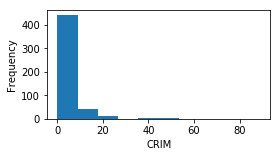

In [5]:
#show a histogram of one of the variables.
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
plt.hist(df['CRIM'])
plt.xlabel("CRIM")
plt.ylabel("Frequency")
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


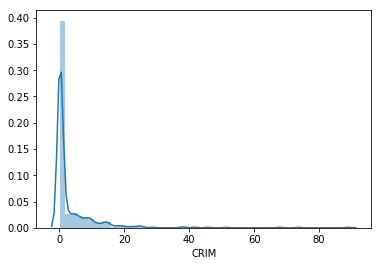

In [4]:
import seaborn as sns
fig = sns.distplot(df['CRIM'], bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260F0D59780>,
      dtype=object)

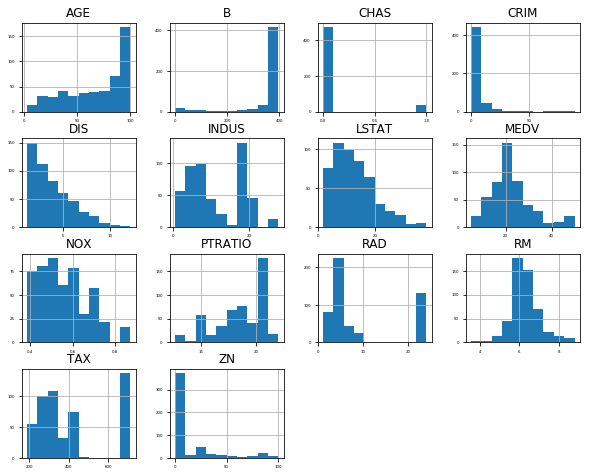

In [11]:
df.hist(figsize=(10,8), xlabelsize=4, ylabelsize=4)


In [12]:
#check correlation
corr_matrix = df.corr()
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

In [13]:
# correlation with target var
features_rel = corr_matrix['MEDV']
print(features_rel)

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


In [14]:
cor_features = features_rel[abs(features_rel) > 0.5]
print(cor_features)

RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


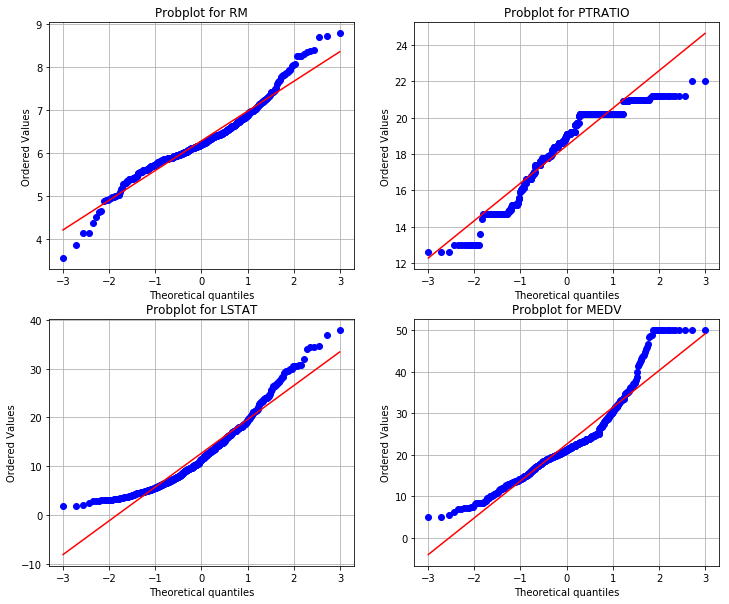

In [15]:
from scipy import stats
plt.figure(figsize=(12,10))
ax1 = plt.subplot(221)
res = stats.probplot(df['RM'], plot=plt)
ax1.set_title("Probplot for RM")
plt.grid(True)
 
ax2 = plt.subplot(222)
res = stats.probplot(df['PTRATIO'], plot=plt)
ax2.set_title("Probplot for PTRATIO")
plt.grid(True)
 
ax3 = plt.subplot(223)
res = stats.probplot(df['LSTAT'], plot=plt)
ax3.set_title("Probplot for LSTAT")
plt.grid(True)
 
ax4 = plt.subplot(224)
res = stats.probplot(df['MEDV'], plot=plt)
ax4.set_title("Probplot for MEDV")
plt.grid(True)
plt.show()

In [16]:
#From the normal probability plots, we can tell that normal distribution is not a good model for these variables. (non-linear probability plot graphs). 
#We will come back to these 4 variables in the next post.

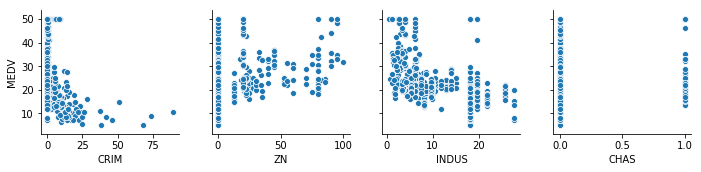

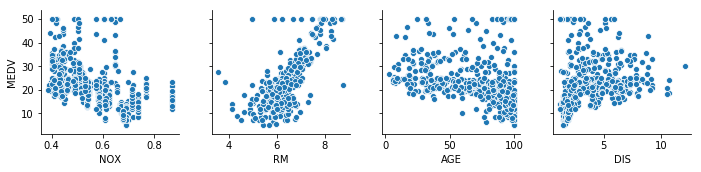

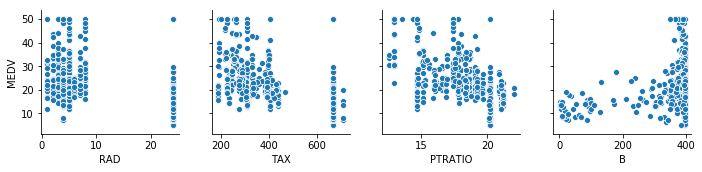

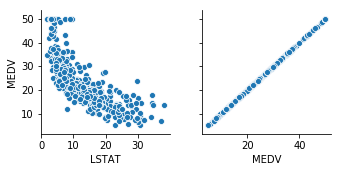

In [18]:
for i in range(0, len(df.columns), 4):
    sns.pairplot(data=df,
    x_vars=df.columns[i:i+4],
    y_vars=['MEDV'])

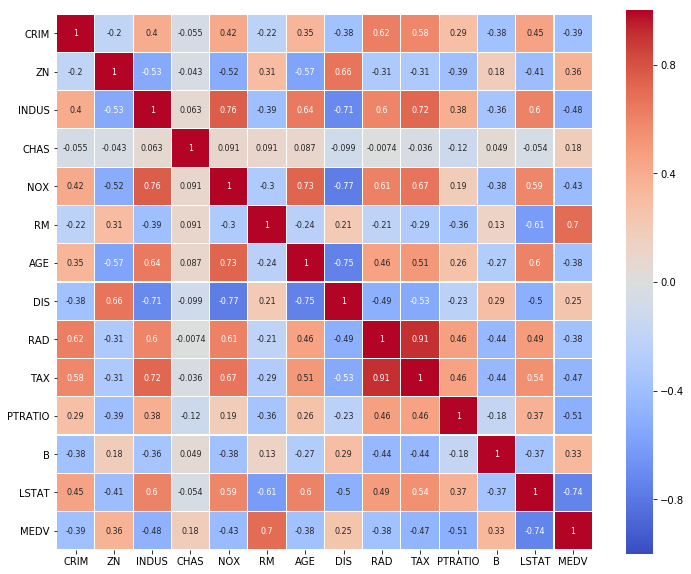

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size":8}, square=True)

In [32]:


def get_features(df):
    features = df.drop('MEDV', axis = 1)
    return features



def get_prices(df):
    prices = df['MEDV']
    #TODO: Inflation rate is 275%
    #prices = np.dot(prices, 275)
    return prices



In [45]:
def price_statistics(prices):
    # TODO: Minimum price of the data
    minimum_price = np.min(prices)
    # TODO: Maximum price of the data
    maximum_price = np.max(prices)
    # TODO: Mean price of the data
    mean_price = np.mean(prices)
    # TODO: Median price of the data
    median_price = np.median(prices)
    # TODO: Standard deviation of prices of the data
    std_price = np.std(prices)
    # Show the calculated statistics
    print("Statistics for Boston housing dataset:\n")
    print("Minimum price: ${:,.2f}".format(minimum_price))
    print("Maximum price: ${:,.2f}".format(maximum_price))
    print("Mean price: ${:,.2f}".format(mean_price))
    print("Median price ${:,.2f}".format(median_price))
    print("Standard deviation of prices: ${:,.2f}".format(std_price))
    print("\n")



In [47]:
import numpy as np
data = df
prices = get_prices(data)
features = get_features(data)
price_statistics(prices)

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19




In [48]:
from sklearn.metrics import r2_score

In [49]:
def performance_metric(actual, predicted):
    """ Calculates and returns the performance score between
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(actual, predicted)
    # Return the score
    return score



In [51]:
print("Question 2 - Question 2 - Goodness of Fit:\n")
## Given a hypothetical model, determine if it successfully captures the variation of the target value based on the model's R2 score
score = performance_metric([3, 5, 2, 7, 4.2], [2.6, 4.3, 1.5, 6.4, 5])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Question 2 - Question 2 - Goodness of Fit:

Model has a coefficient of determination, R^2, of 0.871.


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.3, shuffle=True)
print("3: Training and Testing")
print("Training and testing split was successful.\n")

3: Training and Testing
Training and testing split was successful.



In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [74]:

from sklearn.linear_model import LinearRegression

In [75]:
lm = LinearRegression()

In [76]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [-1.36326720e-01  4.08833230e-02 -2.88462294e-02  2.43959238e+00
 -1.30392300e+01  3.00541617e+00 -1.39162446e-02 -1.28287498e+00
  3.19577143e-01 -1.40201147e-02 -9.78301651e-01  8.38650541e-03
 -4.81259360e-01]


In [78]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predictions')

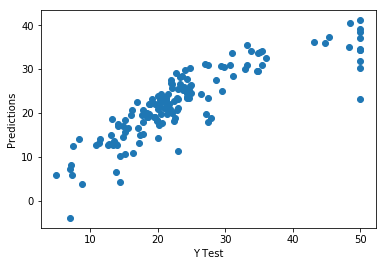

In [79]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [80]:
from sklearn import metrics

In [81]:
print('MSE: ',metrics.mean_squared_error(y_test,predictions))

MSE:  31.64992069177862


In [82]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE:  5.625826223034144


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


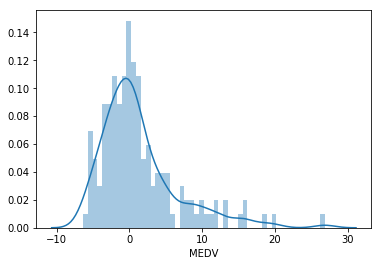

In [83]:

sns.distplot((y_test-predictions),bins=50)

In [86]:
coefficients = pd.DataFrame(lm.coef_,features.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
CRIM,-0.136327
ZN,0.040883
INDUS,-0.028846
CHAS,2.439592
NOX,-13.039230
RM,3.005416
AGE,-0.013916
DIS,-1.282875
RAD,0.319577
TAX,-0.014020
